## Insert Title Here ##

## Introduction ##

Insert Introduction Here

## Preliminary Exploratory Data Analysis ##

In [86]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
require(gridExtra)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [81]:
options(repr.plot.width=15, repr.plot.height=7) # Setting options

The following code imports the April 2023 Canadian Labour Force data into the notebook.

In [82]:
employment <- read_csv("https://raw.githubusercontent.com/GWilliam02/STAT201-Project/main/data/employmentData.csv")

Rows: 108064 Columns: 60
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): SURVMNTH, AGE_12, NAICS_21, NOC_10, NOC_43, WHYLEFTN, EFAMTYPE
dbl (53): REC_NUM, SURVYEAR, LFSSTAT, PROV, CMA, AGE_6, SEX, MARSTAT, EDUC, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [83]:
employment_clean <- employment |>
                    select(NOC_10 ,IMMIG ,HRLYEARN) |>
                    filter(!is.na(HRLYEARN)) |>
                    filter(NOC_10 == "03") |>    #Filters out everyone with STEM Occupations
                    select(-NOC_10) |>
                    rename(immigration_status = IMMIG,
                          hourly_wage = HRLYEARN) |>
                    mutate(immigration_status = case_when(immigration_status == 1 | immigration_status == 2 ~ "Resident",
                                                         immigration_status == 3 ~ "Non-resident"))
                    
                

head(employment_clean)

immigration_status,hourly_wage
<chr>,<dbl>
Resident,9707
Non-resident,4567
Non-resident,3897
Resident,2497
Non-resident,4872
Non-resident,2885


In [84]:
nrow(employment)
nrow(employment_clean)

summary_stats <- employment_clean |>
                group_by(immigration_status) |>
                summarize(count = n(), 
                         mean_wage = mean(hourly_wage))

summary_stats


[1] 108064

[1] 4334

immigration_status,count,mean_wage
<chr>,<int>,<dbl>
Non-resident,2937,4248.751
Resident,1397,4558.674


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



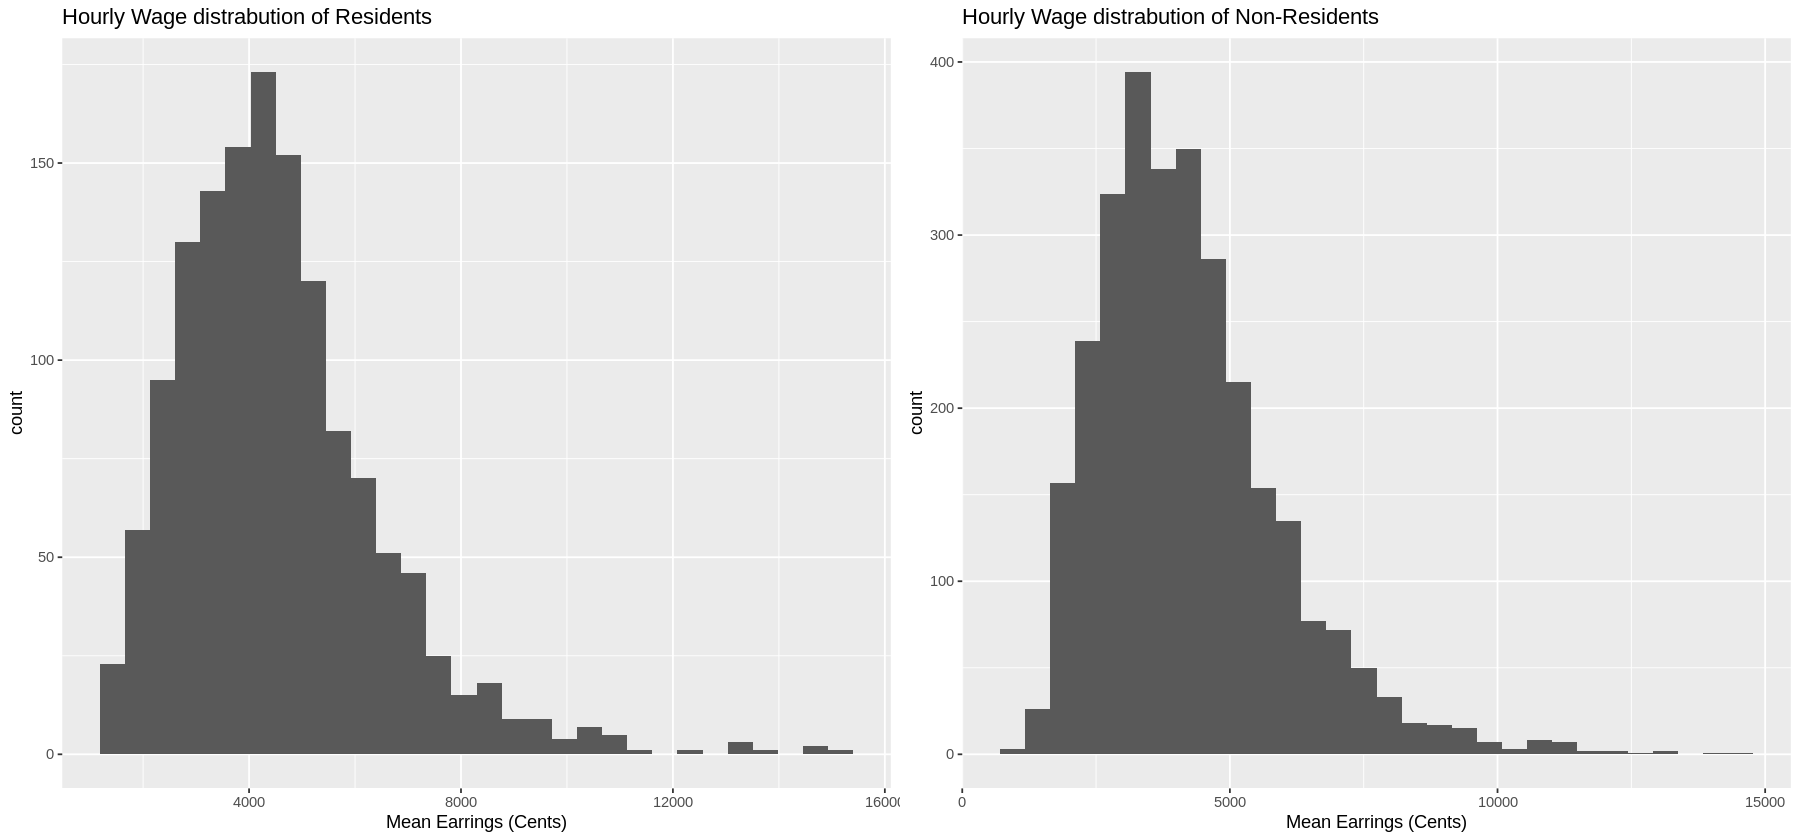

In [88]:
plt_residant <- employment_clean %>% 
    filter(immigration_status == "Resident") %>%
    ggplot() +
    geom_histogram(aes(x=hourly_wage)) +
    ggtitle("Hourly Wage distrabution of Residents") +
    xlab("Mean Earrings (Cents)") 
plt_nonresidant <- employment_clean %>% 
    filter(immigration_status == "Non-resident") %>%
    ggplot() +
    geom_histogram(aes(x=hourly_wage)) +
    ggtitle("Hourly Wage distrabution of Non-Residents") +
    xlab("Mean Earrings (Cents)") 
grid.arrange(plt_residant, plt_nonresidant, ncol=2)

In [ ]:



flipper_length_boxplots <-
    employment_clean %>% 
    ggplot() +
    geom_boxplot(aes(x=immigration_status, y=hourly_wage, fill = immigration_status)) +
    theme(text = element_text(size = 22)) +
    ggtitle("Residant vs Non-residant") + 
    xlab("Residance status") + 
    ylab("Earrings (cents)") + 
    guides(fill = FALSE)
flipper_length_boxplots